# NASA Turbofan Jet Engine - Predictive Maintenance

## 1. Business Understanding

Tahap ini akan menjelaskan hal-hal yang melatar belakangi pengerjaan proyek, merumuskan masalah yang dihadapi, dan tujuan akhir yang ingin dicapai dari proyek *jet engine predictive maintenance* sehingga dapat menjawab masalah yang telah didefinisikan.

**1.1 Hal yang mendasari pembuatan proyek**

Mesin jet merupakan salah satu komponen krusial yang digunakan dalam industri antariksa NASA. Mesin ini digunakan sebagai sumber tenaga dari suatu kendaraan seperti pesawat agar mampu terbang dengan adanya gaya dorong yang dihasilkan dari mesin. Melihat betapa krusialnya peran mesin pada suatu kendaraan, maka diperlukan suatu analisis yang mampu memprediksi kesehatan dari mesin apakah masih berfungsi dengan normal atau sudah mulai membutuhkan perawatan lebih lanjut. Hal ini bertujuan untuk menghindari kegagalan mesin secara mendadak yang berpotensi membahayakan kendaraan tersebut. Salah satu cara untuk mengukur performa mesin adalah dengan menggunakan sensor. Sensor-sensor ini bekerja untuk mengetahui berbagai hal seperti suhu, putaran, tekanan, vibrasi pada mesin, dan lainnya. Untuk itu, pada proyek ini akan dilakukan proses analisis untuk memprediksi kesehatan mesin berdasarkan data sensor sebelum mesin benar-benar mati.


**1.2 Masalah yang dihadapi**

Ketidaktahuan tentang kesehatan mesin dapat berpotensi menyebabkan kegagalan mesin secara mendadak saat digunakan.

**1.3 Proyek yang diusulkan untuk memecahkan masalah**

Mengklasifikasikan kesehatan mesin ke dalam kategori normal atau failure berdasarkan data sensor.

**Dataset**

CMAPSS Jet Engine Simulated Data: https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data

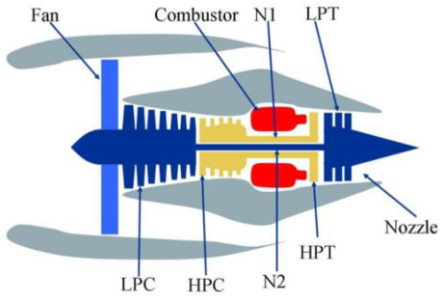

*Gambar 1. Komponen pada mesin jet*

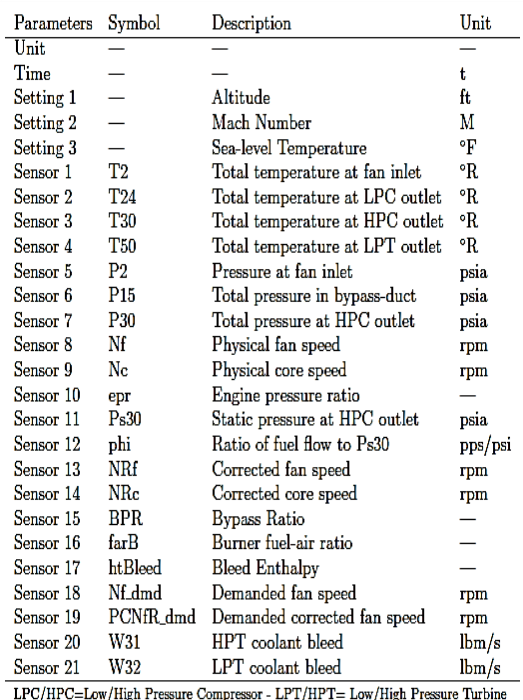

*Gambar 2. Penjelasan tiap prediktor pada dataset*

## 2. Data Understanding

Tahap ini merupakan proses pengenalan terhadap data. Proses ini akan memanggil data yang akan digunakan dan melihat data awal sebelum diproses lebih jauh.

In [1]:
# Memasukkan library dasar yang dibutuhkan untuk mengolah data
import os
import pandas as pd
import math
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk proses pre-processing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Library untuk modeling dan evaluations
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Library untuk menyimpan model
from joblib import dump, load

In [2]:
# Membaca file dataset dan mengubah ke dalam bentuk dataframe
data = pd.read_csv("/content/train_FD001.txt", sep=" ", header=None)

In [3]:
# Cek dimensi dataset
print("Shape of data :", data.shape)

Shape of data : (20631, 28)


**Insight:**

Dataset yang akan digunakan memiliki 20.631 data dengan 28 fitur (prediktor)

In [4]:
# Menampilkan dataset awal
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


**Insight:**

Dari dataset, terlihat nama kolom yang belum representatif (masih dalam bentuk angka) dan terdapat kolom yang berisi nilai **NaN** (*Not a Number*) pada 2 kolom terakhir. Hal ini perlu dilakukan proses lanjutan agar data menjadi bersih. Proses pembersihan ini akan dilakukan pada tahap ***Data Preparation***.

## 3. Data Preparation

 Tahap ini merupakan proses untuk membersihkan data sehingga output dari tahap ini yaitu data yang sudah bersih dan siap digunakan untuk proses pembuatan model *Machine Learning*. Beberapa proses yang dilakukan pada tahap ini diantaranya yaitu:

 * Membersihkan data (membuang nilai NaN, membuang missing value, menghapus prediktor yang tidak relevan/seleksi fitur)
 * Mmelakukan visualisasi data
 * Merubah format data ke bentuk lain sesuai kebutuhan.
 * Membagi dataset menjadi data latih dan data uji.
 * Proses sampling untuk mengatasi masalah dataset tidak seimbang.
 * Proses scaling untuk menyeragamkan skala nilai antar prediktor sehingga tidak terjadi perbedaan nilai yang terlalu besar yang dapat mempengaruhi performa model.

Dalam istilah lain, tahap ini dikenal dengan ***Data Pre-Processing and Data Visualization***

In [5]:
# Menghapus nilai NaN pada 2 kolom terakhir dataset
data.drop(columns=[26, 27], inplace=True)

In [6]:
# Buat daftar nama kolom sesuai deskripsi dataset
columns = [
    'engine', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1',
    'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
    'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
    'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
    'sensor20', 'sensor21'
]

In [7]:
# Mengganti nama kolom pada dataset
data.columns = columns

# Menampilkan dataset yang sudah diberi nama kolom baru
data

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


**Insight**

Setelah dataset diberi nama kolom sesuai deskripsi, dataset terlihat lebih mudah untuk dipahami maksud dari prediktornya.

In [8]:
# Cek apakah ada nilai NaN pada dataset
data.isnull().sum()

engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

**Insight**

Dari data di atas dapat diketahui bahwa dataset telah lengkap dan tidak ada data kosong (NaN) pada dataset sehingga tidak perlu dilakukan proses penanganan missing value.

In [9]:
# Melihat statistik dari dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


**Insight**

Dari data statistik di atas dapat diketahui data-data seperti jumlah baris, nilai rata-rata, standar devisasi, data terkecil, data terbesar, Q1, Q2 (Median), Q3, dan jumlah baris dalam dataset. Dari data tersebut juga terlihat bahwa terdapat beberapa prediktor yang memiliki nilai min dan max sama besar. Hal ini menandakan bahwa prediktor tersebut memiliki nilai konstan yaitu nilai yang sama untuk semua baris. Hal ini tidak akan berpengaruh terhadap target sehingga perlu dilakukan proses lanjutan untuk menghapus prediktor tersebut untuk mengurangi beban komputasi.

In [10]:
def drop_constant_value(dataframe):
    '''
    Function:
        - Untuk menghapus kolom bernilai konstan pada dataset.
        - Nilai konstan yaitu nilai yang sama untuk setiap data pada dataset.
        - Nilai dianggap konstan jika nilai terkecil (min) dan tertinggi (max) pada kolom tersebut sama.
    Args:
        dataframe -> dataset yang akan dicek
    Return:
        dataframe -> dataset yang sudah bersih dari nilai konstan
    '''

    # Membuat variabel penampung untuk menampung kolom bernilai konstan
    constant_column = []

    # Proses mencari nilai konstan dengan melihat nilai min dan max
    for col in dataframe.columns:
        min = dataframe[col].min()
        max = dataframe[col].max()

        # Jika nilai min dan max sama, maka masukkan nama kolom ke variabel penampung
        if min == max:
            constant_column.append(col)

    # Menghapus kolom bernilai konstan pada dataset
    dataframe.drop(columns=constant_column, inplace=True)

    # Mengembalikan dataset yang bersih dari nilai konstan
    return dataframe

In [11]:
# Menghapus nilai konstan pada dataframe untuk data train
data = drop_constant_value(data)
data

,engine,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


**Insight**

Setelah dilakukan proses penghapusan nilai konstan, data train menyisakan 19 prediktor dari yang semula 26 prediktor. Hal ini menunjukan bahwa terdapat 7 prediktor yang memiliki nilai konstan. Nilai konstan tidak berpengaruh apa-apa terhadap target karena nilainya sama untuk semua baris pada dataset sehingga perlu dihapus.

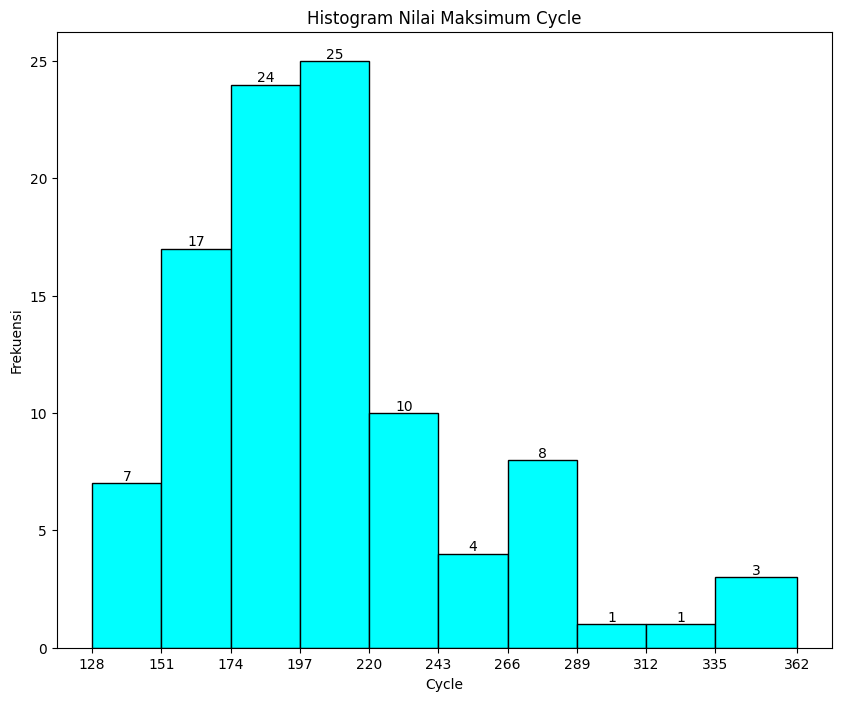

In [12]:
# Visualisasi nilai max cycle untuk tiap mesin pada data train
df_max_cycle = data[['engine', 'cycle']].groupby('engine').max().reset_index()

# Menentukan ukuran plot
plt.figure(figsize=(10, 8))

# Menghitung lebar bins
bins_count = 10
max_value = df_max_cycle['cycle'].max()
min_value = df_max_cycle['cycle'].min()
bins_width = round((max_value - min_value) / bins_count)
bins_list = []

# Membuat list lebar bins
for i in range(bins_count):
    bins_list.append(min_value)
    min_value += bins_width

    if i+1 == bins_count:
        bins_list.append(max_value)

# Menentukan frekuensi RUL berdasarkan data bins (bins => pembagian kategori)
values, bins, bars = plt.hist(df_max_cycle['cycle'], bins=bins_list, color='cyan', edgecolor='black')
plt.xticks(bins)

# Mengatur label pada plot
plt.title("Histogram Nilai Maksimum Cycle")
plt.xlabel('Cycle')
plt.ylabel('Frekuensi')
plt.bar_label(bars)
plt.show()

**Insight**

Dari histogram di atas dapat diketahui bahwa maksimal cycle terendah yaitu 128 cycle dan tertinggi yaitu 362 cycle. Dari hasil histogram juga diketahui bahwa nilai maksimal cycle cenderung miring ke arah kiri atau ke arah minimal. Hal ini menandakan bahwa kebanyakan mesin memiliki maksimal cycle antara 128 - 220.

In [13]:
def assign_label(data, threshold):
    '''
    Function:
        - Untuk memberi label pada dataset
    Args:
        - data -> dataset yang akan diberi label
        - threshold -> nilai ambang batas cycle sebelum failure
    Return:
        - data -> dataset yang sudah diberi label
    '''

    for i in range(1, 101):
        # Mencari nilai maksimal cycle tiap engine
        max_cycle = data.loc[(data['engine'] == i), 'cycle'].max()

        # Menentukan cycle ke berapa yang harus berlabel 1 (failure)
        start_warning = max_cycle - threshold

        # Proses assign label 1 ke dataset
        data.loc[(data['engine'] == i) & (data['cycle'] > start_warning), 'status'] = 1

    # Proses assign label 0 ke dataset
    data['status'].fillna(0, inplace=True)

    # Mengembalikan dataset yang telah diberi label
    return data

In [14]:
threshold = 20
data = assign_label(data, threshold)
data

,engine,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,status
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,1.0
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,1.0
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,1.0
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1.0


**Insight**

Untuk menentukan label apakah suatu cycle sudah masuk kategori failure atau masih normal, digunakan nilai threshold 20. Artinya, untuk setiap mesin jika nilai cycle nya sudah mencapai `(maksimal cycle - threshold)`, maka cycle tersebut akan dilabeli sebagai failure. Misalnya, engine 1 memilili maksimal cycle 120. Maka cycle 101 s.d. 120 akan dilabeli sebagai failure. Hal ini dilakukan untuk mencegah mesin benar-benar mati sehingga dapat dilakukan perawatan dan persiapan penggantian mesin lebih dini.

0:  18631  data
1:  2000  data


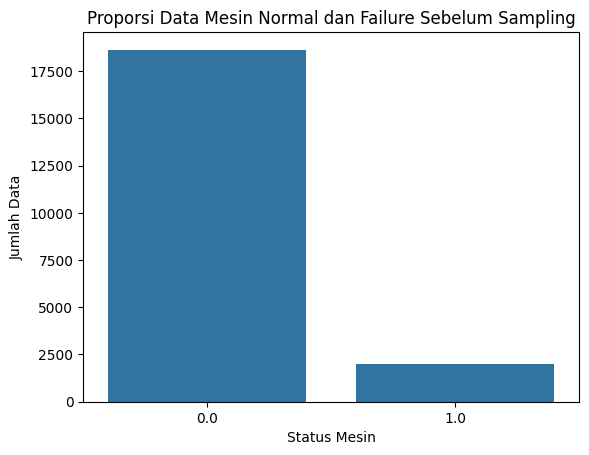

In [15]:
# cek proporsi antara mesin normal (0) dan failure (1)
sns.countplot(x='status', data=data)
plt.title("Proporsi Data Mesin Normal dan Failure Sebelum Sampling")
plt.xlabel('Status Mesin')
plt.ylabel('Jumlah Data')

print("0: ", len(data[data['status'] == 0]), " data")
print("1: ", len(data[data['status'] == 1]), " data")

**Insight**

Dari data barplot di atas dapat diketahui bahwa data cycle mesin yang tergolong normal sejumlah 18.631 cycle dan failure sejumlah 2.000 cycle. Dari jumlah tersebut dapat dikatakan bahwa proporsi nilai minoritas yaitu 9.7% dari total data dalam dataset. Merujuk pada sumber dari [google](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data), proporsi tersebut masuk pada kategori moderate sehingga perlu dilakukan proses sampling untuk menambah data pada data minoritas.

Text(0.5, 1.0, 'Heatmap Nilai Korelasi Antar Fitur')

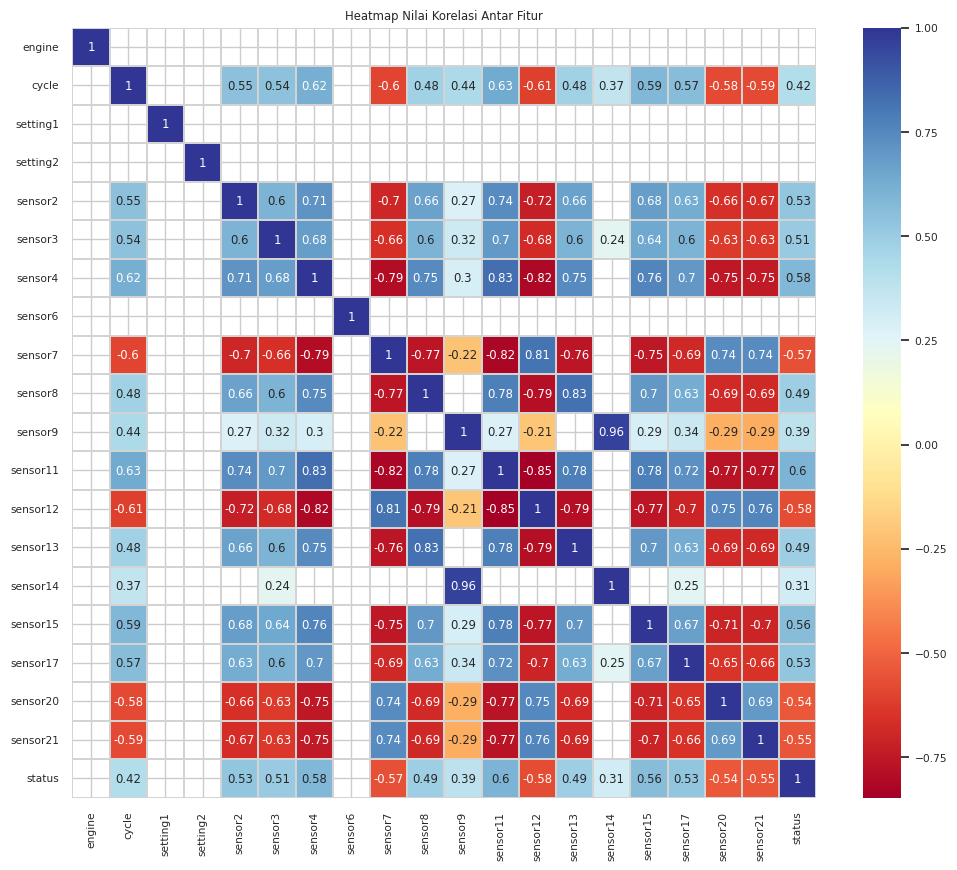

In [16]:
# Heatmap untuk mengecek korelasi antar fitur dengan threshold
threshold = 0.2
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.set_style("whitegrid", {"axes.facecolor": ".0"})

cluster = data.corr()
mask = cluster.where((abs(cluster) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')
plt.title("Heatmap Nilai Korelasi Antar Fitur")

**Insight**

Dari tabel heatmap di atas, hanya prediktor yang memiliki nilai absolut korelasi lebih dari atau sama dengan threshold yang akan ditampilkan. Nilai theshold 0.2 digunakan karena nilai korelasi yang di atas angka 0.2 merupakan korelasi yang cukup kuat. Sedangkan di bawah 0.2 masuk kategori sangat lemah sehingga tidak perlu digunakan. Nilai negatif menunjukan bahwa prediktor tersebut memiliki korelasi yang berkebalikan dengan prediktor lainnya. Misalnya sensor 2 dan sensor 7 yang memiliki nilai korelasi -0.7. Artinya, ketika nilai pada sensor 2 meningkat maka nilai sensor 7 akan menurun dan sebaliknya. Semakin tinggi nilai korelasi, maka saling mempengaruhi satu sama lain. Nilai absolut nilai korelasi yaitu antara 0 s.d. 1. Nilai 0 artinya tidak korelasi sedangkan 1 artinya korelasi sangat kuat.

In [17]:
# Menampilkan fitur yang memiliki nilai korelasi terhadap target >= nilai threshold
correlation = data.corr()
relevant_features = correlation[abs(correlation['status']) >= threshold]
relevant_features['status']

cycle       0.418602
sensor2     0.526491
sensor3     0.508912
sensor4     0.582934
sensor7    -0.565367
sensor8     0.494334
sensor9     0.385557
sensor11    0.600408
sensor12   -0.577070
sensor13    0.491833
sensor14    0.313872
sensor15    0.561315
sensor17    0.525363
sensor20   -0.540980
sensor21   -0.547923
status      1.000000
Name: status, dtype: float64

In [18]:
# Mengambil fitur yang relevan (nilai korelasi >= threshold)
list_relevant_features = list(relevant_features.index[1:])

# Pertahankan fitur yang relevan dan hapus sisanya
data = data[list_relevant_features]
data

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,status
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.0
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.0
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.0
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.0
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,1.0
20627,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,1.0
20628,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,1.0
20629,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1.0


**Insight**

Dari proses seleksi fitur di atas, dapat disimpulkan bahwa terdapat 14 prediktor dan 1 target yang akan digunakan untuk proses modeling. Pemilihan prediktor ini didasarkan pada seberapa berpengaruh prediktor tersebut terhadap target) dengan nilai threshold korelasi 0.2. Angka 0.2 ke atas menandakan bahwa prediktor tersebut memiliki korelasi yang cukup kuat terhadap target.

In [19]:
# Memisah dataset menjadi prediktor (X) dan target (y)
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

# Membagi dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Mengubah y_train ke bentuk 1 dimensi
y_train = y_train.squeeze()

In [20]:
# Cek jumlah data untuk training dan testing
print("Shape of train : ", X_train.shape)
print("Shape of test  : ", X_test.shape)

Shape of train :  (16504, 14)
Shape of test  :  (4127, 14)


In [21]:
# Cek jumlah cycle mesin normal dan failure pada testing
print("Cycle normal (aktual)  : ", y_test.value_counts()[0])
print("Cycle failure (aktual) : ", y_test.value_counts()[1])

Cycle normal (aktual)  :  3770
Cycle failure (aktual) :  357


**Insight**

*   Proses pembagian dataset menggunakan skema 80:20 artinya 80% data digunakan untuk data train dan 20% data untuk data test. Dari pembagian data tersebut dapat diketahui bahwa jumlah data untuk proses training sebanyak 16.504 data dan jumlah data untuk proses testing sebanyak 4.127 data. Angka 14 menunjukan bahwa terdapat 14 prediktor yang akan dicari polanya selama proses pembelajaran.
*   Dari 4.127 data test yang digunakan, diketahui terdapat 3.770 cycle mesin yang memiliki status normal. Sedangkan 357 cycle mesin memiliki status failure.

0:  14861  data
1:  14861  data


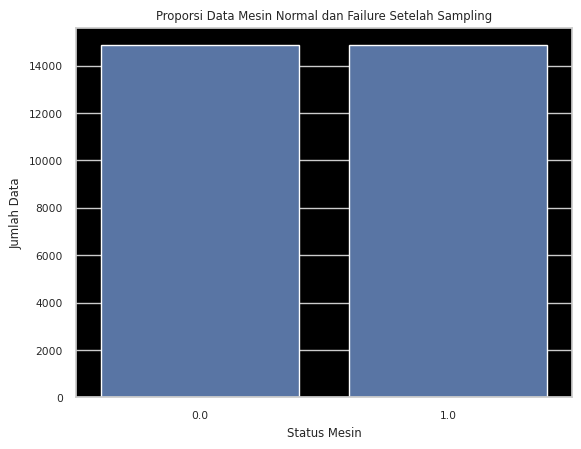

In [22]:
# Proses oversmapling untuk menangani masalah imbalanced dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Cek proporsi antara mesin normal (0) dan failure (1)
data = X_train
data['status'] = y_train

sns.countplot(x='status', data=data)
plt.title("Proporsi Data Mesin Normal dan Failure Setelah Sampling")
plt.xlabel('Status Mesin')
plt.ylabel('Jumlah Data')
print("0: ", len(data[data['status'] == 0]), " data")
print("1: ", len(data[data['status'] == 1]), " data")

**Insight**

Oversampling merupakan proses untuk menambah data sintetis ke dalam kelas minoritas sehingga proporsi antara kedua kelas seimbang. Terlihat pada barplot di atas dapat diketahui bahwa setelah proses oversampling, jumlah data antara mesin normal dan failure sudah seimbang dengan masing-masing status memiliki 14.861 data. Hal ini perlu dilakukan agar model tidak sensitif terhadap salah satu kelas saja.

In [23]:
# Mengubah bentuk X_train menjadi dataframe kembali
X_train = pd.DataFrame(X_train, columns = X.columns)

# Proses scaling untuk menyeragamkan skala nilai antar fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menyimpan variabel scaler untuk proses prediksi pada unseen data
dump(scaler, 'scaler.bin', compress=True)

# Menampilkan data setelah proses scaling
X_train_scaling = pd.DataFrame(X_train, columns = X.columns)
X_train_scaling

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.938390,-0.556666,-0.909093,0.212688,0.177875,-0.622271,-1.015749,0.792598,-0.397959,-0.579051,-0.892908,-0.094989,0.888048,0.960463
1,-1.392110,-0.144523,-1.030363,1.533963,-1.576763,0.055578,-1.046601,2.175096,-1.319749,0.095758,-2.040381,-2.481010,0.746002,0.934275
2,-1.095447,-2.171478,-1.281174,0.592911,-1.459787,-0.782529,-1.817908,1.107313,-0.397959,-0.414380,-1.480251,-0.691494,1.456235,0.495435
3,-0.467220,-1.711510,-1.025770,1.524457,-1.342811,-0.519402,-1.324272,1.545666,-1.665420,-0.247229,-1.121949,-1.288000,1.124793,1.821479
4,-0.606826,-1.057426,-1.002802,0.298238,0.294851,-0.806351,-0.676374,0.736399,0.178160,-0.679218,-1.072059,-0.691494,0.414559,0.469248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29717,0.445690,1.209339,0.834500,-0.819891,1.347633,-1.180792,0.415787,-0.347741,1.498290,-0.881607,0.491178,1.098022,-0.813797,0.271253
29718,0.957616,1.364339,1.040986,-1.121383,1.268609,-0.059821,0.799902,-1.229398,0.719684,0.102551,1.195119,0.501517,-1.430785,-1.405503
29719,0.274123,1.338818,0.614799,-0.441951,-0.496831,1.982762,0.222743,-0.283947,-0.589316,2.069433,0.583104,0.501517,-0.790301,-0.595673
29720,1.199629,1.536722,0.874485,-0.822968,-0.032885,2.017594,1.380752,-0.790664,0.265570,1.737952,1.163457,1.098022,-1.161015,-0.405578


**Insight**

Dari hasil scaling terlihat bahwa untuk semua prediktor memiliki jangkauan data yang tidak berbeda jauh. Hal ini akan memudahkan dalam proses pembuatan model machine learning dan mengurangi waktu dan resource komputasi yang dibutuhkan.

## 4. Modeling & Evaluation

 Tahap ini merupakan proses untuk membuat model machine learning yang nantinya akan digunakan untuk proses prediksi. Beberapa hal yang dilakukan pada tahap ini yaitu:

*   Memilih algoritma machine learning yang akan digunakan dan tuning hyperparameter.
*   Proses fitting atau proses model belajar.
*   Proses evaluasi model untuk mengetahui performa model.

Output dari tahap ini adalah model yang telah dilatih dan siap digunakan untuk proses prediksi.




### 4.1 Model Random Forest

In [24]:
# Membuat object dari class RandomForestClassifier()
model = RandomForestClassifier()

# Proses training
model = model.fit(X_train, y_train)

# Menyimpan model ML untuk proses prediksi pada unseen data
dump(model, 'model_rf.bin', compress=True)

['model_rf.bin']

In [25]:
# Proses prediksi data test
y_predict = model.predict(X_test)

In [26]:
# Melihat hasil prediksi dari data test
print("Cycle mesin normal (prediksi)  : ", pd.Series(y_predict).value_counts()[0])
print("Cycle mesin failure (prediksi) : ", pd.Series(y_predict).value_counts()[1])

Cycle mesin normal (prediksi)  :  3678
Cycle mesin failure (prediksi) :  449


**Insight**

Dari data test yang digunakan, model memprediksi terdapat 3.678 cycle yang berstatus normal dan 449 cycle yang berstatus failure. Nilai ini akan kita cocokan dengan data aktual yaitu y_test untuk mengetahui performa model.



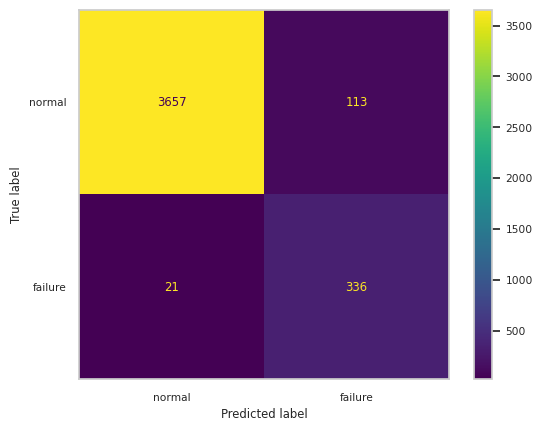

In [27]:
# Menampilkan tabel confusion matrix
matrix = metrics.confusion_matrix(y_test, y_predict)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["normal", "failure"])
matrix_display.plot()
plt.grid(False)
plt.show()

**Insight**

Dari tabel confusion matrix di atas, dapat diketahui hal-hal sebagai berikut:

*   `True Positive (TP)` -> Cycle failure yang benar diprediksi failure. Ada sebanyak 336 data.
*   `True Negative (TN)` -> Cycle normal yang benar diprediksi normal. Ada sebanyak 3.657 data.
*   `False Positive (FP)` -> Cycle normal yang diprediksi failure. Ada sebanyak 113 data.
*   `False Negative (FN)` -> Cycle failure yang diprediksi normal. Ada sebanyak 21 data.





In [28]:
print("Accuracy  : ", metrics.accuracy_score(y_test, y_predict))
print("Precision : ", metrics.precision_score(y_test, y_predict))
print("Recall    : ", metrics.recall_score(y_test, y_predict))
print("F1 Score  : ", metrics.f1_score(y_test, y_predict))

Accuracy  :  0.9675308941119457
Precision :  0.7483296213808464
Recall    :  0.9411764705882353
F1 Score  :  0.8337468982630273


**Insight**

Dari nilai evaluasi di atas, dapat disimpulkan sebagai berikut:

*   Nilai `accuracy` menunjukan bahwa model mampu memprediksi 96% data dengan benar. Dengan kata lain, dari 4.127 data uji model dapat dengan benar memprediksi 3.989 data.
*   Nilai `precision` menunjukan bahwa dari semua cycle yang diprediksi failure oleh model, ternyata hanya 74% yang benar. Dengan kata lain, dari 449 cycle yang diprediksi failure ternyata hanya 336 cycle yang benar-benar berstatus failure. Sisanya berstatus normal.
*   Nilai `recall` menunjukan bahwa dari semua cycle yang aktualnya memang benar-benar berstatus failure, ternyata hanya 94% yang berhasil diprediksi failure oleh model. Dengan kata lain, dari 357 cycle yang memang failure, mampu memprediksi dengan benar sebanyak 337 cycle. Hanya 20 cycle berstatus failure yang terprediksi normal oleh model.
*   Nilai `F1` menunjukan bahwa model mampu mengenali kondisi cycle mesin masih normal dan failure dengan baik. Tidak condong ke salah satu kondisi saja.



### 4.2 Model Artificial Neural Network

In [29]:
# Import library untuk membangun arsitektur neural network
from keras.layers import Dense, LeakyReLU
from keras.models import Sequential

# Import library untuk mengurangi nilai error
from keras.optimizers import Adam

# Import library untuk mencegah overfitting
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [30]:
# Membangun arsitektur neural network
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation = LeakyReLU(), kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation = LeakyReLU(), kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation = LeakyReLU(), kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate = 0.0001) # optimizer
model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# membuat objek dari class EarlyStopping()
earlystopper = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    patience = 5,
    verbose= 1)

# fit network
history = model.fit(
    X_train,
    y_train,
    epochs = 200,
    batch_size = 128,
    validation_split = 0.20,
    verbose = 1,
    callbacks = [earlystopper])

history_dict = history.history

# Menyimpan model ML untuk proses prediksi pada unseen data
dump(model, 'model_nn.bin', compress=True)

Epoch 1/200
186/186 [==============================] - 3s 9ms/step - loss: 4.5718 - accuracy: 0.9424 - val_loss: 3.4823 - val_accuracy: 0.9943
Epoch 2/200
186/186 [==============================] - 1s 8ms/step - loss: 2.7408 - accuracy: 0.9596 - val_loss: 2.0740 - val_accuracy: 0.9899
Epoch 3/200
186/186 [==============================] - 2s 13ms/step - loss: 1.6270 - accuracy: 0.9638 - val_loss: 1.2306 - val_accuracy: 0.9845
Epoch 4/200
186/186 [==============================] - 2s 10ms/step - loss: 0.9665 - accuracy: 0.9652 - val_loss: 0.7404 - val_accuracy: 0.9800
Epoch 5/200
186/186 [==============================] - 1s 8ms/step - loss: 0.5878 - accuracy: 0.9657 - val_loss: 0.4686 - val_accuracy: 0.9749
Epoch 6/200
186/186 [==============================] - 1s 8ms/step - loss: 0.3769 - accuracy: 0.9653 - val_loss: 0.3172 - val_accuracy: 0.9739
Epoch 7/200
186/186 [==============================] - 2s 8ms/step - loss: 0.2621 - accuracy: 0.9660 - val_loss: 0.2417 - val_accuracy: 0.96

['model_nn.bin']

**Catatan**

Secara umum, proses pembelajaran (training) pada neural network terdiri dari 2 proses utama yaitu forward dan backward.


*   `Forward` => Proses untuk menghasilkan nilai output. Proses ini dimulai dari input layer > hidden layer > output layer. Di layer output, kemudian dilakukan proses perhitungan nilai loss untuk mengetahui nilai error. Seberapa jauh nilai prediksi dengan nilai aktualnya. Jika nilai error lebih besar dari ambang batas yang ditentukan, maka dilakukan proses backward.
*  `Backward` => Proses untuk mengupdate bobot. Jika nilai error yang dihasilkan terlalu besar, maka dilakukan proses backward untuk mengupdate bobot pada tiap neuron pada tiap layer. Proses ini dilakukan dalam rangka menurunkan nilai error yang dihasilkan.



Penjelasan dari beberapa istilah:


*   `Learning rate` => Seberapa besar bobot pada neuron berubah selama proses training dalam rangka meminimalkan nilai error. Nilai LR memiliki range antara 0 s.d. 1. Semakin besar nilai LR, semakin cepat proses training. Begitupun sebaliknya semakin kecil nilai LR, maka proses training semakin lambat. Diperlukan` tuning hyperparameter `untuk mencari nilai LR yang tepat.
*   `Epochs` => Hyperparameter yang menentukan berapa kali algoritma deep learning bekerja melewati seluruh dataset baik secara forward (maju) maupun backward (mundur). Forward berfungsi untuk menentukan nilai prediksi/output. Sedangkan backward berfungsi untuk mengupdate bobot jika nilai error yang dihasilkan dari proses forward terlalu besar (melebihi threshold).
*   `Batch size` => Merupakan jumlah sampel data yang disebarkan ke Neural Network. Misalnya ada 100 data dan memiliki batch size 10. Maka 10 data pertama akan disebarkan ke neural network untuk proses pembelajaran. Kemudian 10 data berikutnya. Begitu seterusnya sampai 100 data tersebar semua. Setiap 1x data tersebar semua, maka dianggap 1 epochs.
*   `Optimizer` => Fungsi yang digunakan untuk melakukan update bobot pada proses backward. Nilai bobot ini perlu diupdate dalam rangka meminimalkan nilai error.
*   `Loss` => Fungsi yang digunakan untuk menghitung nilai error. Jika nilai error > threshold, maka akan dilakukan proses backward untuk mengupdate bobot. Proses forward dan backward ini dilakukan secara terus menerus sampai tercapai 2 kondisi yaitu tercapainya maksimal epochs atau nilai error < threshold yang ditentukan.



**Insight**

Algoritma Neural Network yang digunakan memiliki arsitektur sebagai berikut:

*   Jumlah layer => 5 yang terdiri dari 1 input layer, 3 hidden layer, dan 1 output layer.
*   Input layer memiliki 14 neuron. Angka ini disesuaikan dengan banyaknya prediktor pada data train.
*   Hidden layer 1, 2, dan 3 masing-masing memiliki 512, 256, dan 128 neuron.
*   Output layer memiliki 1 neuron dengan fungsi aktivasi sigmoid. Hal ini memungkinkan untuk menghasilkan output berupa nilai pecahan antara 0 s.d. 1. Pada project ini menggunakan threshold 0.5. Jika nilai output >= 0.5 maka failure dan jika < 0.5 maka normal.
*   Arsitektur ini menggunakan fungsi optimizer ADAM. Fungsi ini digunakan untuk mengatur bobot tiap neuron pada proses pembelajaran.
*   Fungsi loss yang digunakan yaitu `binary_crossentropy`. Fungsi ini digunakan untuk menghitung nilai error pada output layer. Nilai error didapat dari selisih antara data aktual dan data prediksi.
*   Metrik evaluasi yang diukur selama proses pembelajaran mesin yaitu nilai akurasi.
*   Proses pembelajaran ini menggunakan fungsi `EarlyStopping()` yang berfungsi untuk menghentikan proses pembelajaran jika model tidak bertambah baik untuk waktu tertentu.

Text(0.5, 1.0, 'Learning Curve Pada Pembelajaran Neural Network')

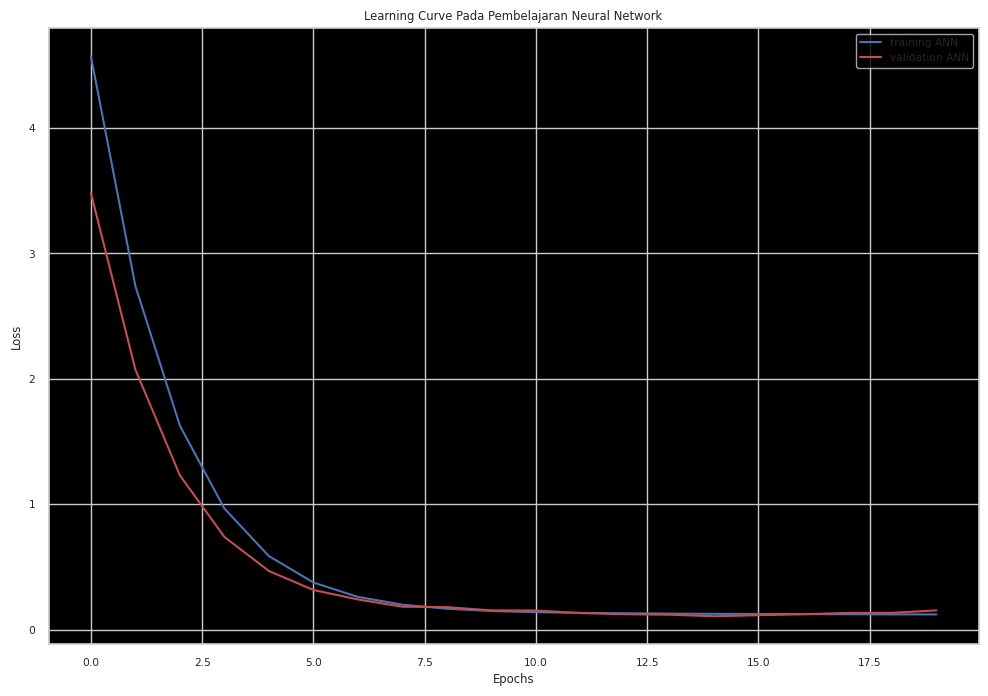

In [31]:
# Membuat kurva pembelajaran neural network
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure(figsize=(12,8))
plt.plot(loss_values, 'b', label = 'training ANN')
plt.plot(val_loss_values, 'r', label = 'validation ANN')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve Pada Pembelajaran Neural Network")

**Insight**

Kurva pembelajaran menggambarkan seberapa baik model kita. Apakah model mampu menggeneralisasi data atau hanya baik pada salah satu data saja. Berdasarkan kurva pembelajaran (learning curve) di atas, dapat diketahui bahwa nilai loss pada data train dan data validation berhimpit. Hal ini menunjukan bahwa model tidak mengalami overfitting. Overfitting merupakan kondisi di mana model sangat baik dalam mengenali data train, tetapi memiliki performa buruk dalam mengenali data test.

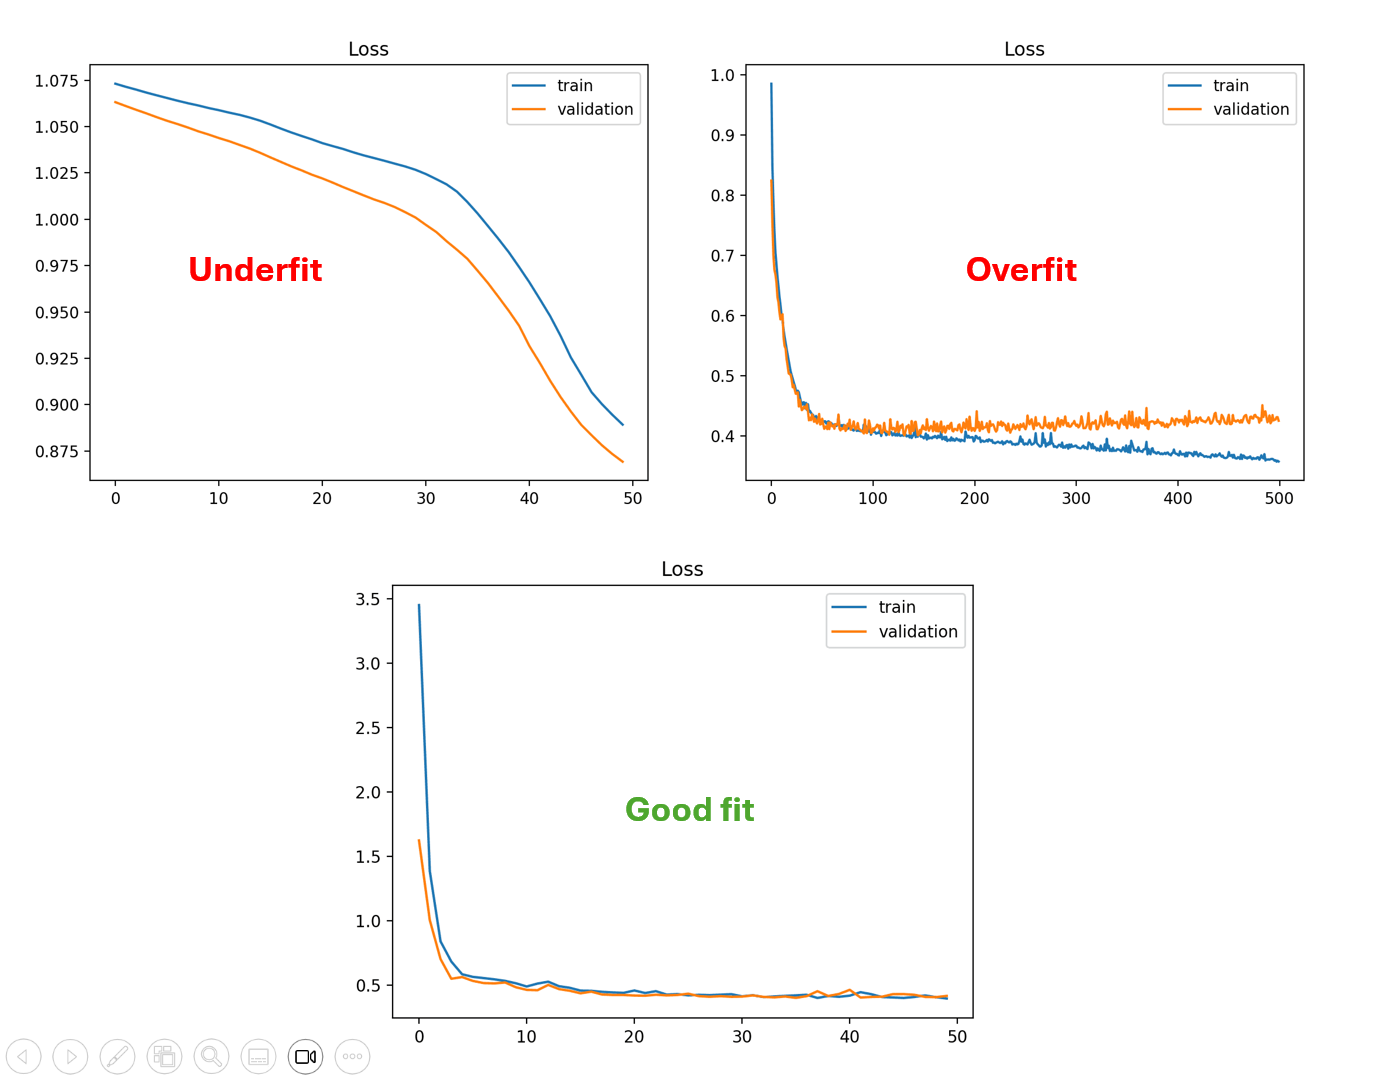

**Catatan**


*   `Underfit` => Model gagal memahami data. Model yang dihasilkan tidak merepresentasikan data training. Tidak baik digunakan untuk proses prediksi. Ditandai dengan garis training dan validation tidak pernah berhimpit (berjauhan).
*   `Overfit` => Model terlalu pintar memahami data. Model sangat baik mengenali data training tetapi hal ini berimbas pada kegagalan model dalam memprediksi data yang tidak pernah dilihat sebelumnya. Model yang overfit juga tidak baik digunakan untuk proses prediksi. Ditandai dengan garis training dan validation yang mulanya berhimpit nampun semakin lama semakin jauh.
*   `Good fit` => Model yang mampu menggenalisir data latih. Model mampu membuat batas antar kelas dengan baik sehingga jika ada data baru, model ini dapat memprediksi dengan baik. Model yang good fit inilah yang cocok digunakan untuk proses prediksi. Ditandai dengan garis training dan validation yang selalu berhimpit sampai akhir proses training.



129/129 [==============================] - 0s 2ms/step


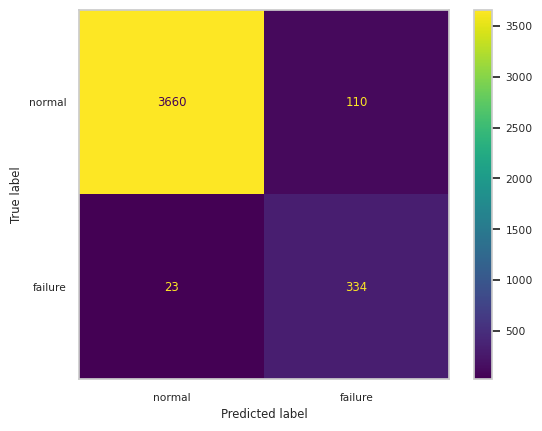

In [32]:
# Proses prediksi menggunakan data test untuk menguji seberapa baik model yang dihasilkan
y_predict = (model.predict(X_test) > 0.5).astype('int32')

# Menampilkan tabel confusion matrix
matrix = metrics.confusion_matrix(y_test, y_predict)
matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["normal", "failure"])
matrix_display.plot()
plt.grid(False)
plt.show()

In [33]:
print("Accuracy  : ", metrics.accuracy_score(y_test, y_predict))
print("Precision : ", metrics.precision_score(y_test, y_predict))
print("Recall    : ", metrics.recall_score(y_test, y_predict))
print("F1 Score  : ", metrics.f1_score(y_test, y_predict))

Accuracy  :  0.9677732008723043
Precision :  0.7522522522522522
Recall    :  0.9355742296918768
F1 Score  :  0.8339575530586767


**Insight**

Dari nilai evaluasi di atas, dapat disimpulkan sebagai berikut:

*   Nilai `accuracy` menunjukan bahwa model mampu memprediksi 96% data dengan benar. Dengan kata lain, dari 4.127 data uji model dapat dengan benar memprediksi 3.992 data.
*   Nilai `precision` menunjukan bahwa dari semua cycle yang diprediksi failure oleh model, ternyata hanya 75% yang benar. Dengan kata lain, dari 449 cycle yang diprediksi failure ternyata hanya 338 cycle yang benar-benar berstatus failure. Sisanya berstatus normal.
*   Nilai `recall` menunjukan bahwa dari semua cycle yang aktualnya memang benar-benar berstatus failure, ternyata hanya 93% yang berhasil diprediksi failure oleh model. Dengan kata lain, dari 357 cycle yang memang failure, mampu memprediksi dengan benar sebanyak 335 cycle. Hanya 22 cycle berstatus failure yang terprediksi normal oleh model.
*   Nilai `F1` menunjukan bahwa model mampu mengenali kondisi cycle mesin masih normal dan failure dengan baik. Tidak condong ke salah satu kondisi saja.


## 5. Deployment

Tahap ini digunakan untuk menetapkan model yang akan digunakan untuk proses prediksi. Kemudian dilakukan proses prediksi data baru untuk menghasilkan suatu output.

Untuk proses deployment, digunakan tools bernama Flask. User diminta untuk memasukkan data sensor yang diminta. Berbekal model ML yang sudah dilatih sebelumnya, model akan memprediksi apakah suatu mesin masih normal atau failure berdasarkan data sensor yang telah dimasukkan oleh user.

### 5.1 Halaman Awal

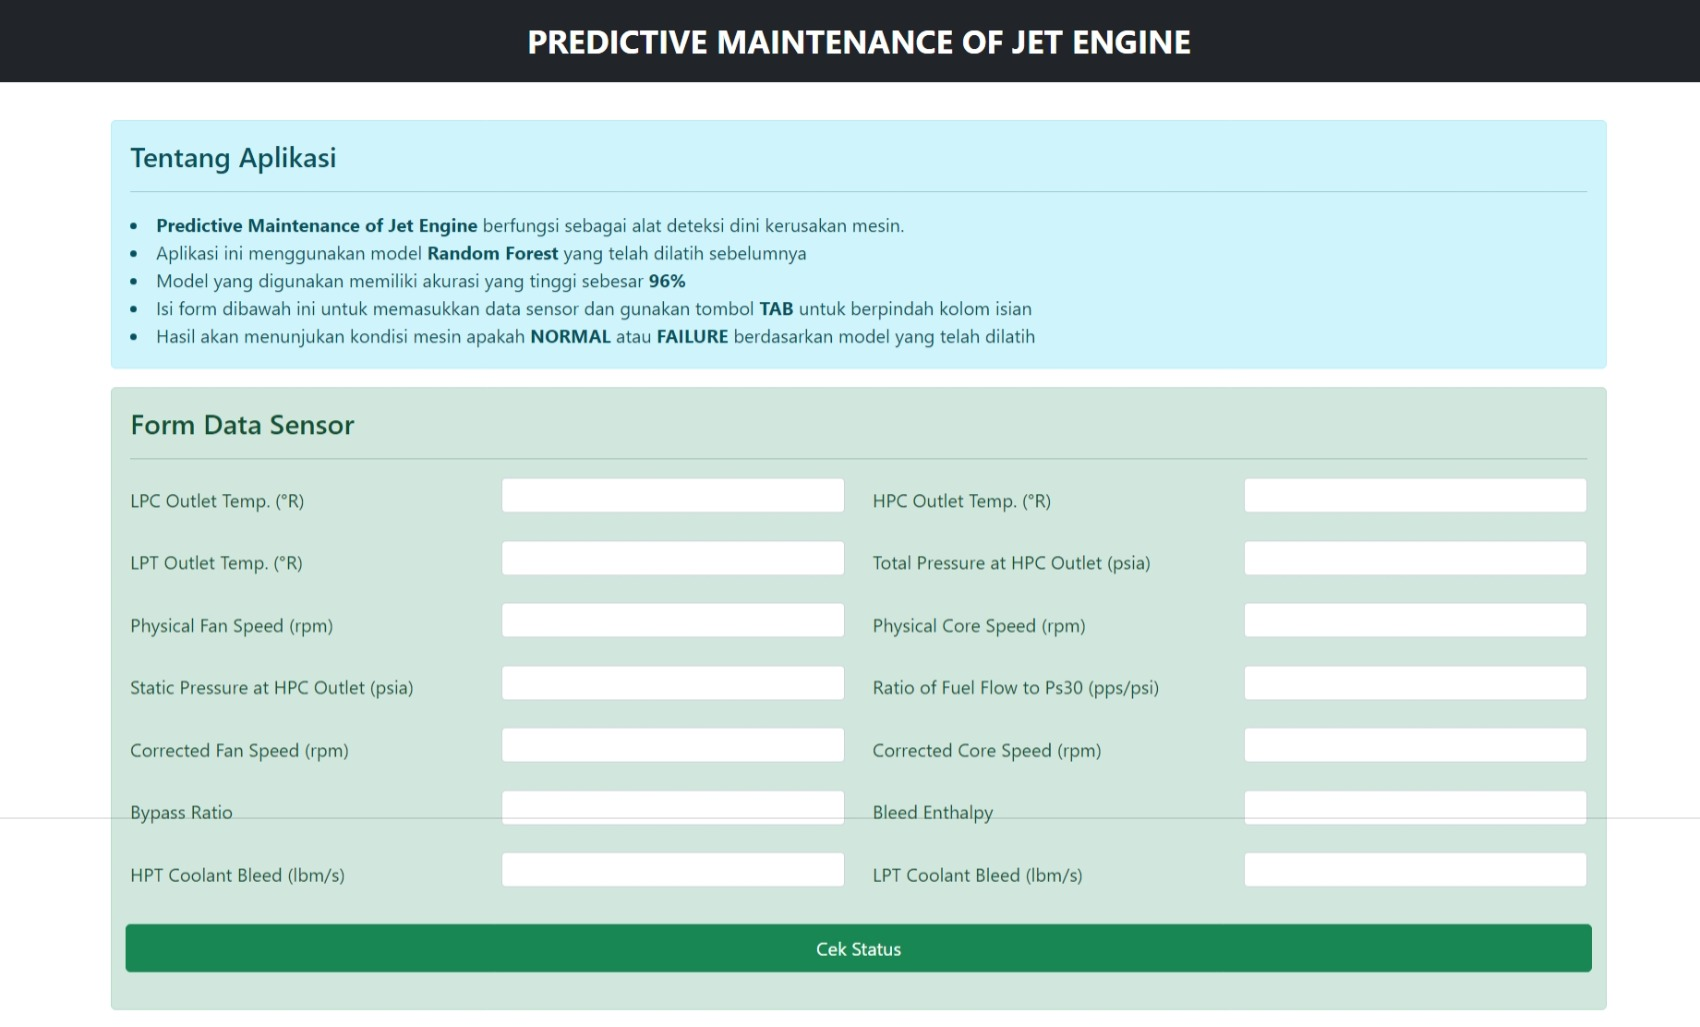

### 5.2 Tampilan Ketika Mesin Normal

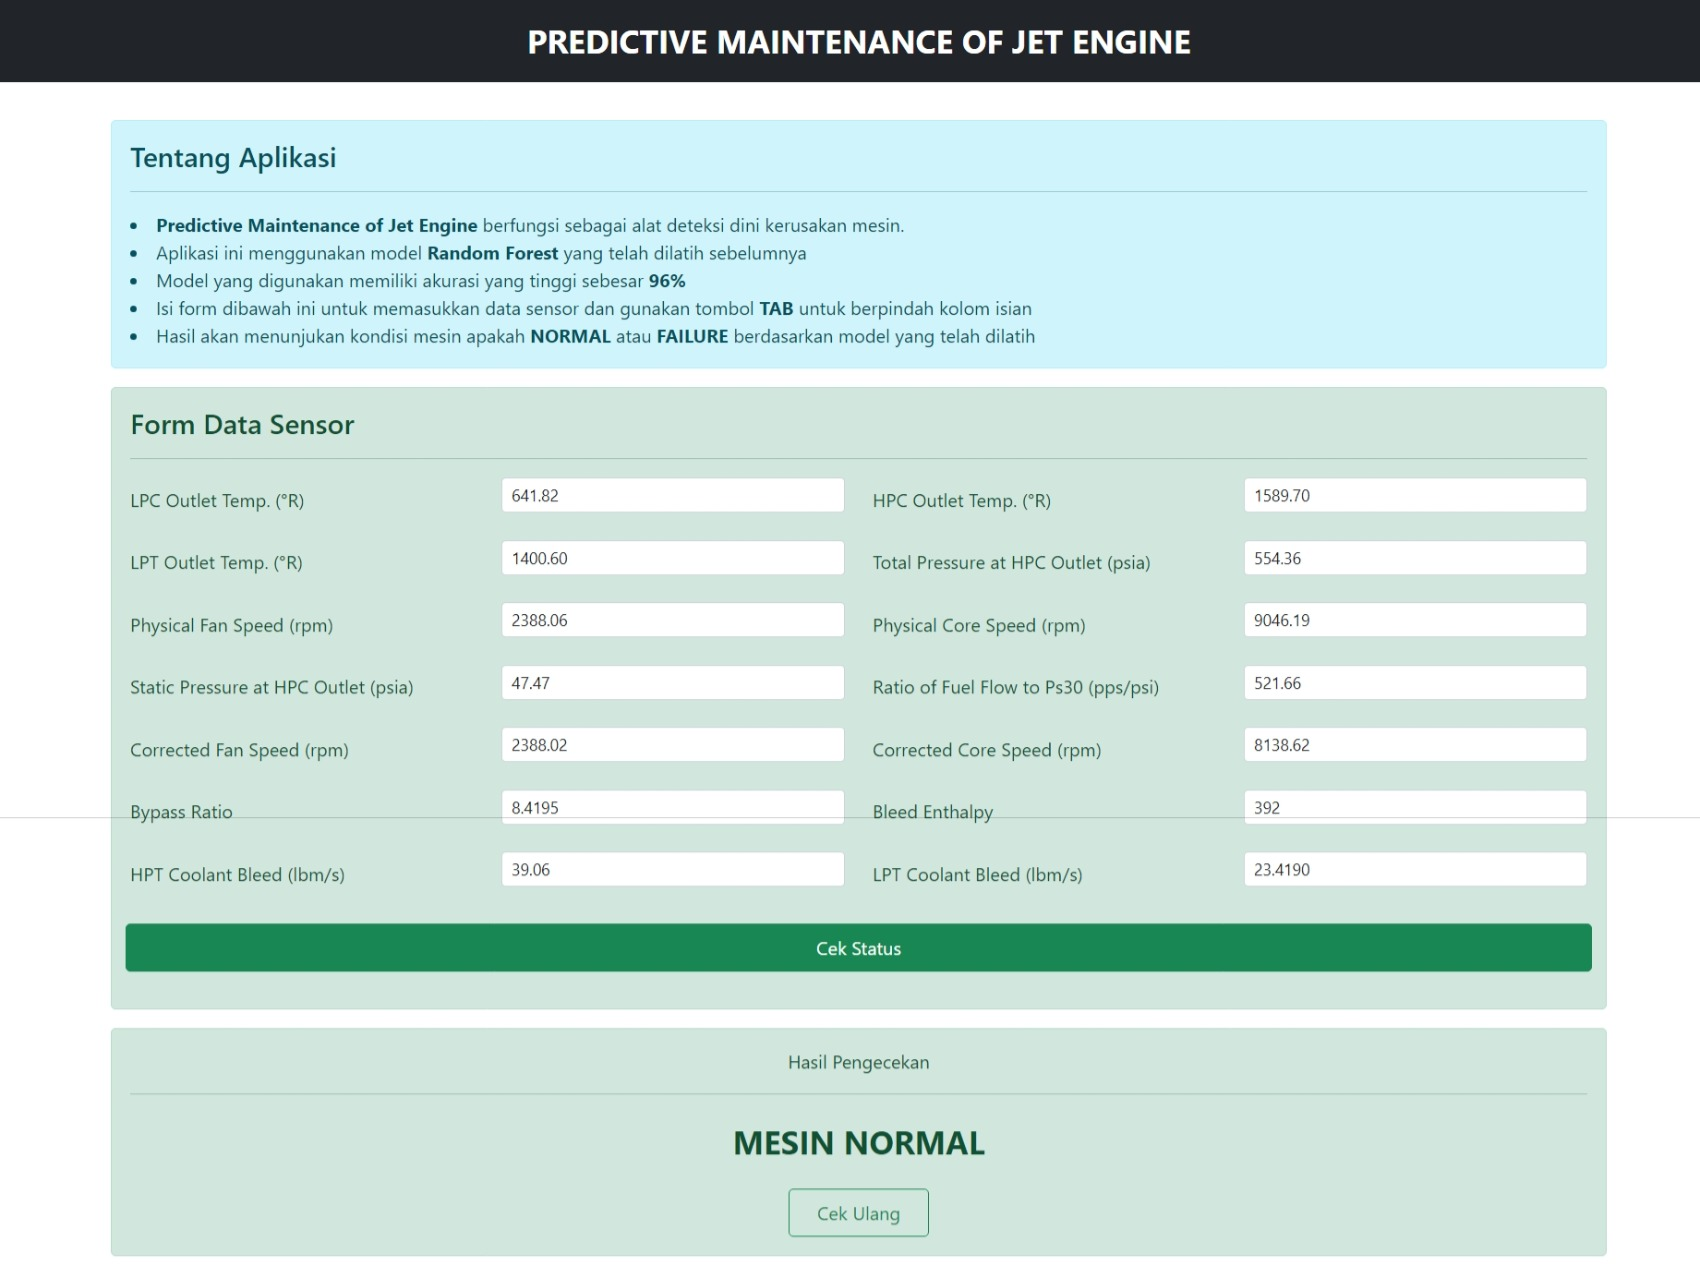

### 5.3 Tampilan Ketika Mesin Failure

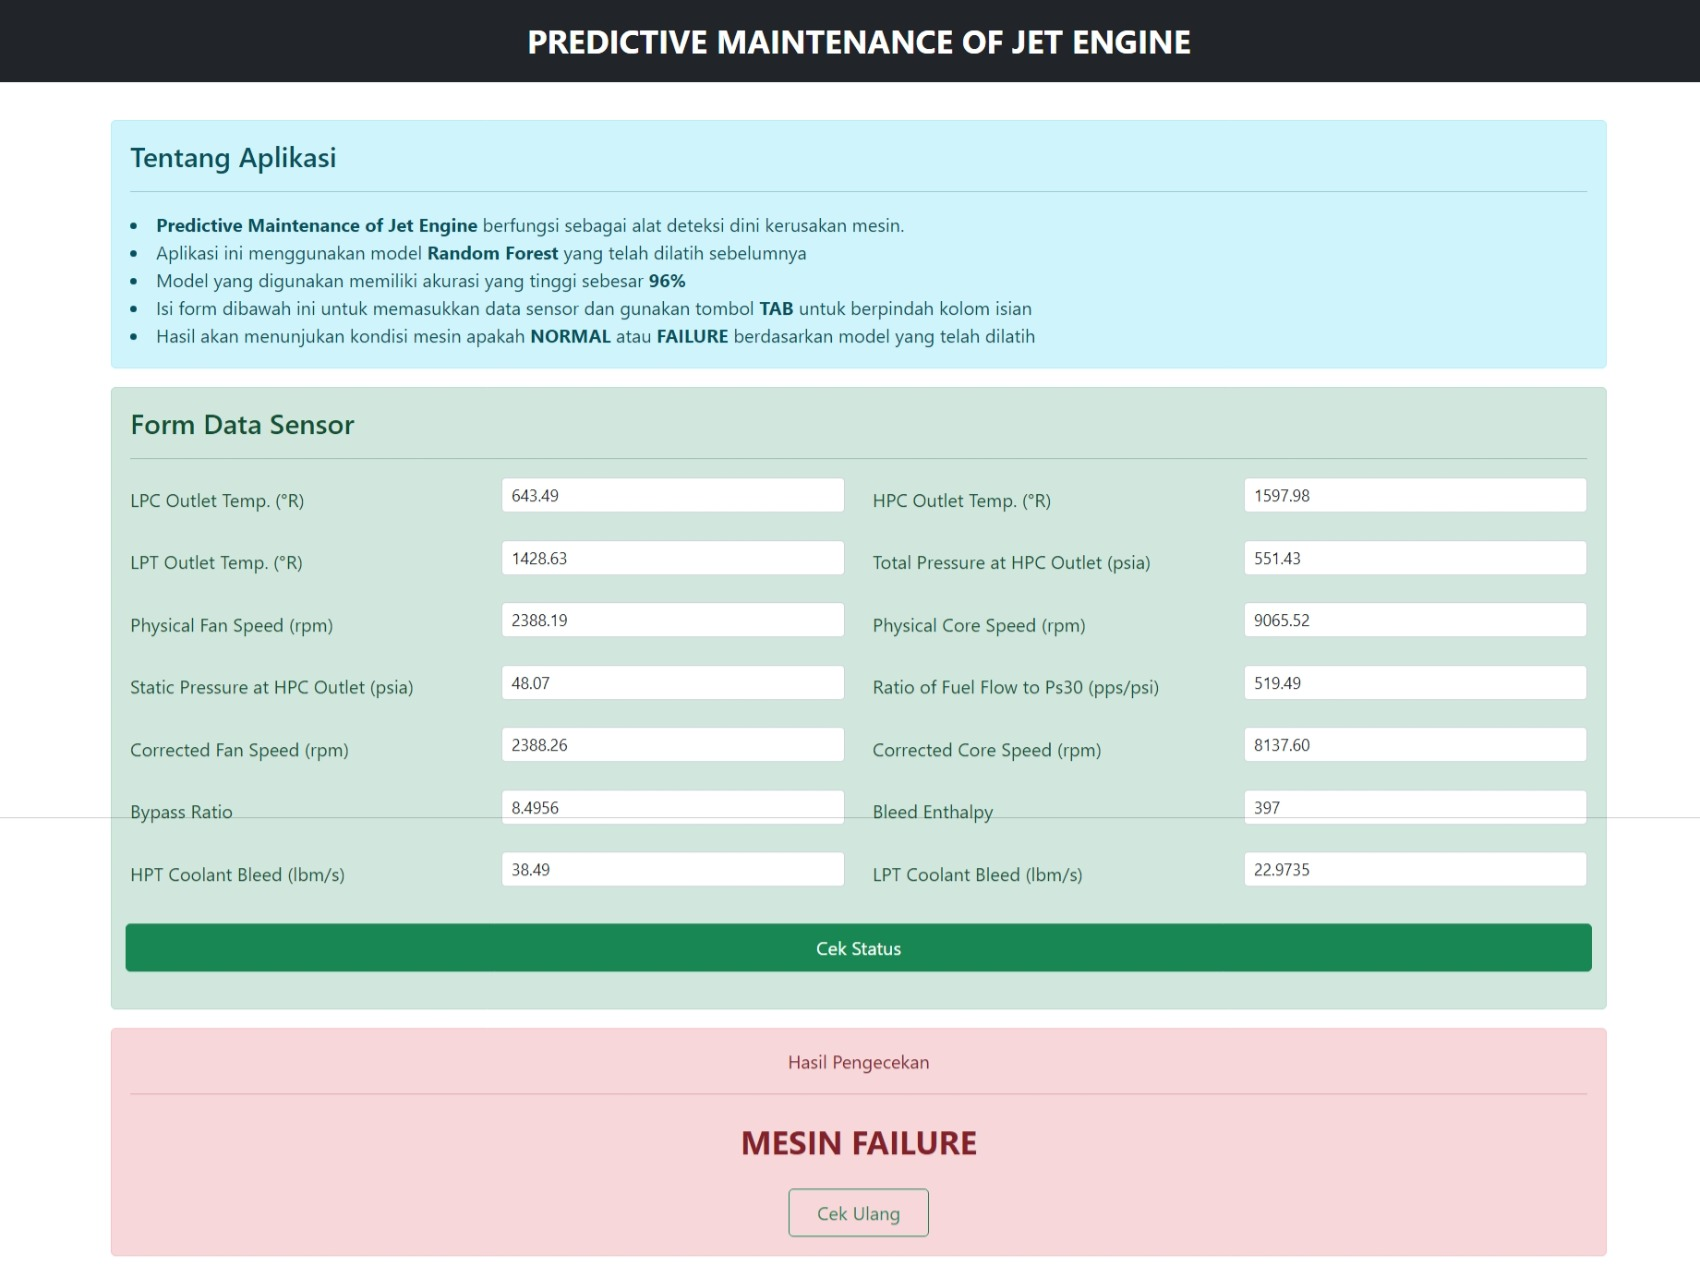